In [59]:
import nltk
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
else:
    print("Unknown System")

In [60]:
import pandas as pd
from konlpy.tag import Okt
t = Okt()

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
df = pd.read_csv("./data/구석구석_서울_크롤링_imageurl.csv")
text_df = df[['장소명', '한줄설명', '상세설명','리뷰']]

text_df = text_df.drop_duplicates()

In [62]:
# 불용어
stop_word = [
    ' ',',','.','등','수','이요','요','번','앞','곳','집','류','모','봉','돌','호선','객','부','콩','겸','그','위','계','무','안','눈','방','이','팅',
    '비','통','석','개','세','순','외','점','전','것','두','나','옥','내','역','과','뿐','이류','찰','더','여','년','로','층','차','종','배','중','몽',
    '도','날','널','때','꼭','및','볼','후','룸','의','실','또','제','온','를','터','인','탕','총','각','명','저','리','처','존','뜻','이자','움','입',
    '게','좀','데','기','만','용','초','몸','핫','거','넉','끼','단','접','호','창','난','칸','스','또한','듯','때문','린','오','시','은','함','적','샷',
    '이후','마치','가도','원','임','이제','얼마','밍','재','란','송','거나','구','중이','늘','감','앤','변','목','대해','근대','운','널리','곳도','가끔',
    '주','걸','장','상','이외','통해','얼','유','사','도량','갓','너','고기구'
]

In [63]:
# from konlpy.corpus import kolaw
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# import nltk

# # 상위 500개 word cloud 그리기
# ko = nltk.Text(token)
# data = ko.vocab().most_common(500)
# tmp_data = dict(data)

# wordcloud = WordCloud(
#     background_color='white',
#     relative_scaling=0.2,
#     font_path='AppleGothic'
# ).generate_from_frequencies(tmp_data)

# plt.figure(figsize=(16,8))
# plt.imshow(wordcloud, interpolation='bilinear')

# plt.show()

In [64]:
sent_arr = []

for index in range(0, len(text_df)) :
    text_df_one = text_df.iloc[index, :]
    sentence = ""

# ----------------------------------------

    # 한줄설명이 null이 아닐때,
    if ~text_df_one.isnull().한줄설명 :
        sentence += text_df_one.한줄설명

    # 상세설명이 null이 아닐때,
    if ~text_df_one.isnull().상세설명 :
        sentence += text_df_one.상세설명

    # 리뷰가 null이 아닐때,
    if ~text_df_one.isnull().리뷰 :
        sentence += text_df_one.리뷰

    # 토큰화
    token = t.nouns(sentence)
    # 불용어 제거
    temp = [word for word in token if word not in stop_word]
    # 정제된 토큰들로 다시 문장화
    sent_arr.append(temp)

In [65]:
# input_text = "가족들이랑 가기 좋은 강남구 근처 피자집"

# token = t.nouns(input_text)
# temp = [word for word in token if word not in stop_word]

# sent_arr.insert(0, temp)

In [66]:
# result = []
# result_dict = {}
# find_arr = []

# for data in x :
#     result.append(cosine_similarity(x[0], data))

# for index, data in enumerate(result) :
#     result_dict[index] = data[0][0]

#     # find_arr.append(f"{index} : {data[0][0]}")

# find = sorted(result_dict.values(), reverse=True)[:10]

# find_dict = {}
# for i,data in enumerate(result_dict.values()) :
#     find_dict[data] = i


# find_key = []
# for value in find :
#     find_key.append(find_dict[value])

# for i in find_key :
#     print(df.loc[i,'장소명'])

문장의 최대 길이 : 1255
문장의 평균 길이 : 75.18988902589396


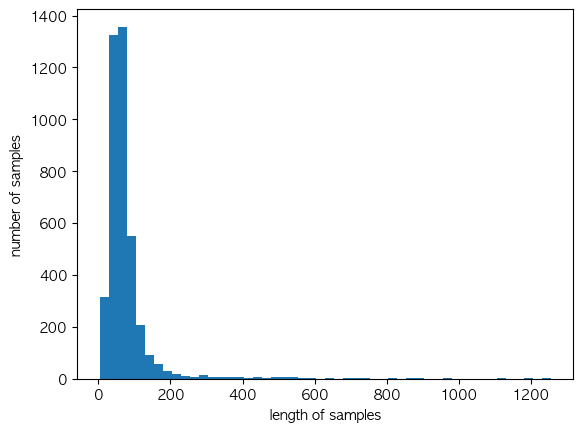

In [67]:
# 길이 분포 확인
print('문장의 최대 길이 :',max(len(review) for review in sent_arr))
print('문장의 평균 길이 :',sum(map(len, sent_arr))/len(sent_arr))

plt.hist([len(review) for review in sent_arr], bins=50)

plt.xlabel('length of samples')
plt.ylabel('number of samples')

plt.show()

In [68]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = sent_arr, vector_size = 100, window = 5, min_count = 0, workers = 4, sg = 0, epochs=10)

w2v_dict = model.wv.key_to_index

w2v_arr = []
for sent_arr_value in sent_arr :
    w2v_temp = []
    for value in sent_arr_value :
        w2v_temp.append(w2v_dict[value])
        # if value in w2v_dict:
        #     w2v_temp.append(w2v_dict[value])
        # else:
        #     w2v_temp.append(-1)  # 없는 단어를 -1로 표시하거나 다른 값으로 대체

    w2v_arr.append(w2v_temp)

In [69]:
print(max([max(i) for i in w2v_arr]))
print(min([min(i) for i in w2v_arr]))

21101
0


최대값 : 21101 <br>
최소값 : 0

In [70]:
# 정규화
w2v_scaled = []
for v in w2v_arr :
    temp_arr = []
    for data in v :
        temp_arr.append(data / 21101)
    w2v_scaled.append(temp_arr)

In [71]:
# 한 문장의 최대 길이
max_len = max([len(x) for x in w2v_scaled])
max_len

1255

In [72]:
import numpy as np

In [73]:
# -1의 값으로 패딩 추가
padded_sentences = []

for i in w2v_scaled :
    if len(i) < max_len :
        i = i + [-1.0] * (max_len - len(i))
    padded_sentences.append(i)

pad_sent = np.array(padded_sentences)

In [74]:
pad_sent.shape

(4055, 1255)

In [75]:
trd = pad_sent
trt = np.array(text_df.장소명)

In [76]:
trt

array(['한옥갈비', '일미간장게장본점', '향림사', ..., '오향족발', '이북만두', '미가할매집'],
      dtype=object)

In [88]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 가게 이름을 클래스 레이블(정수)로 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(text_df.장소명)  # y_train은 가게 이름을 포함한 타겟 데이터

# 클래스 레이블을 원-핫 인코딩
one_hot_encoder = OneHotEncoder(sparse=False)
y_train_one_hot = one_hot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [89]:
y_train_one_hot.shape

(4055, 4039)

In [ ]:
# trt = np.array(text_df.index)

In [80]:
from sklearn.model_selection import train_test_split

v_trd, vad, v_trt, vat = train_test_split(trd, trt, test_size=0.2)

In [81]:
print(v_trd.shape) # 훈련 인풋
print(v_trt.shape) # 훈련 타겟 

print(vad.shape) # 검증 인풋
print(vat.shape) # 검증 타겟

(3244, 1255)
(3244,)
(811, 1255)
(811,)


In [82]:
num_classes = len(text_df.index)

In [83]:
from tensorflow import keras

# Sequential 모델 생성
model = keras.Sequential()

# SimpleRNN 레이어 추가
model.add(keras.layers.SimpleRNN(8, input_shape=(1255, 1)))  # 입력 데이터의 형태: (특성 수, 시퀀스 길이)

# Dense 출력 레이어 설정
model.add(keras.layers.Dense(num_classes, activation='softmax'))  # num_classes는 가게 범주의 수에 해당

# RMSprop 옵티마이저 정의
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

# 모델 컴파일: categorical_crossentropy 손실 함수 사용
model.compile(
    optimizer=rmsprop,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# # ModelCheckpoint와 EarlyStopping 콜백 정의
checkpoint_cb = keras.callbacks.ModelCheckpoint("./data/best-simpleRnn-model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4055)           │        36,495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,575 (142.87 KB)

 Trainable params: 36,575 (142.87 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
# 모델 학습
history = model.fit(
    v_trd,  # 훈련 데이터
    v_trt,  # 원-핫 인코딩된 타겟 데이터
    epochs=100,
    batch_size=60,
    validation_data=(vad, vat),  # 검증 데이터
    # callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100


2024-06-28 14:05:01.286521: W tensorflow/core/framework/op_kernel.cc:1816] OP_REQUIRES failed at cast_op.cc:122 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/opt/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/opt/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/opt/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/opt/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 523, in process_one

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/var/folders/q5/q667z4nj3mv72k7_1mqf5hd80000gn/T/ipykernel_10000/4238941162.py", line 2, in <module>

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 314, in fit

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 117, in one_step_on_iterator

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 104, in one_step_on_data

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 316, in compute_loss

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/losses/loss.py", line 39, in __call__

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/tree/tree_api.py", line 148, in map_structure

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/tree/optree_impl.py", line 79, in map_structure

  File "/opt/anaconda3/lib/python3.11/site-packages/optree/ops.py", line 594, in tree_map

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/losses/loss.py", line 40, in <lambda>

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/core.py", line 495, in convert_to_tensor

  File "/opt/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/sparse_categorical_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_67677]

In [ ]:
from gensim.models import FastText

fast_model = FastText(sent_arr, window=5, min_count=5, workers=4, sg=1)

In [ ]:
fast_model.wv.most_similar("여의도")

[('샛강', 0.8128864169120789),
 ('역삼', 0.787244975566864),
 ('선유도', 0.7846770882606506),
 ('마포구', 0.7823004722595215),
 ('마포대교', 0.7706500887870789),
 ('여의천', 0.7692015767097473),
 ('빛섬', 0.7671794295310974),
 ('한강', 0.7667026519775391),
 ('한강대교', 0.7645562291145325),
 ('유람선', 0.7633981108665466)]

----

In [65]:
# 불용어
stop_word = [
    ' ',',','.','등','수','이요','요','번','앞','곳','집','류','모','봉','돌','호선','객','부','콩','겸','그','위','계','무','안','눈','방','이','팅',
    '비','통','석','개','세','순','외','점','전','것','두','나','옥','내','역','과','뿐','이류','찰','더','여','년','로','층','차','종','배','중','몽',
    '도','날','널','때','꼭','및','볼','후','룸','의','실','또','제','온','를','터','인','탕','총','각','명','저','리','처','존','뜻','이자','움','입',
    '게','좀','데','기','만','용','초','몸','핫','거','넉','끼','단','접','호','창','난','칸','스','또한','듯','때문','린','오','시','은','함','적','샷',
    '이후','마치','가도','원','임','이제','얼마','밍','재','란','송','거나','구','중이','늘','감','앤','변','목','대해','근대','운','널리','곳도','가끔',
    '주','걸','장','상','이외','통해','얼','유','사','도량','갓','너','고기구','깃'
]

In [207]:
import pandas as pd

df = pd.read_csv('./data/구석구석_서울크롤링_4057.csv')

In [208]:
# 사용할 컬럼
use_col = ['장소명', '상세설명','한줄설명', '리뷰','대표메뉴','취급메뉴', '주소']
drop_data = []

for i in df:
    # 전체 컬럼 중 사용할 컬럼이 아니면 제거
    if i not in use_col:
        drop_data.append(i)

df = df.drop(drop_data, axis=1)

In [209]:
# 주소 결측치
df.주소[df.주소.isnull()]

# 제거
df.drop(index=2665, inplace=True)

# index 수정
df.reset_index(drop='index', inplace=True)

In [210]:
# null 값 공백으로 치환
df.fillna('', inplace=True)

In [211]:
from konlpy.tag import Komoran
import re
ko = Komoran()

for col in use_col[1:]:
    for row, text in enumerate(df[col]):
        # 이모지, 특수문자 제거
        token = ko.nouns(re.sub('[^A-Za-z0-9가-힣]', ' ', text))

        # 정제된 토큰들로 다시 문장화
        df.loc[row, col] = " ".join(token)

In [163]:
df

,장소명,한줄설명,상세설명,주소,대표메뉴,취급메뉴,리뷰
0,한옥갈비,갈비 감칠맛 양념 조합,한옥 갈비 동대문 닭 마리 골목 자리 갈비 구이 전문 깃 집 종로5가역 1호선 과 ...,서울특별시 종로구 종로 40 종로,양념 소 갈비 돼지갈비,양념 소 갈비 돼지갈비 갈비살 오 겹 살 외,갈비 돌솥비빔밥 갈비 풍미 비빔밥 돌 솥
1,일미간장게장본점,년 전통 간장 게장 전문 식당,서울 동대문구 장안동 상가 거리 년 전통 간장 게장 전문 식당 간장 게장 사람 인기...,서울특별시 동대문구 장한로 24 길,간장 게장,꽃게 찜 꽃게 탕 아귀찜 해물탕 등,
2,향림사,계단 천정 불화 유리 밖 건물,서울 양천구 신정동 산 공원 목동 차 우성아파트 사이 위치 규모 조계종 소속 불교 ...,서울특별시 양천구 중앙로 14 나기,,,
3,친구네정육식당,,보라매역 인근 위치 배 성비 수 고기 전문 정육 식당 맛집 고기 합리 가격 수 것 ...,서울특별시 동작구 여의대방로 26 길,돼지 마리,돼지 마리 소한 마리 삼겹살 외,
4,트레블로지 명동 시티홀,교통편 인기 관광지 쇼핑몰 곳 위치 호텔,트레블 지 명동 시티홀 이름 단장 호텔 동안 친절 효율 서비스 고객 필요 충족 시설...,서울특별시 중구 세종대로 16 길,,,
...,...,...,...,...,...,...,...
4051,이화감자국,맛,감 잣 국 골목 편 속 이화 감자 국 유명세 자랑 고기 무한 리필 반찬 자랑 김치 ...,서울특별시 은평구 응 암,감자탕,감자탕 뼈 찜,
4052,태조대림감자국,고기 우거지 환상 조합,태 조대림 감자 국 서울시 은평구 응암동 자리 감자탕 전문점 응암동 감자 국거리 전...,서울특별시 은평구 응 암,감자탕,감자탕 양념 뼈 구이 등,
4053,오향족발,득 족발 곳,공덕동 족발 골목 초창기 터 곳 평 식당 시작 지금 모습 득 족발 맛 물론 국 주문...,서울특별시 마포구 만리재로 공덕 시장,족발,족발 국 외,
4054,이북만두,,서울 교동 서울 시청 뒤 골목 위치 대표 음식 평양 식 손 만두 김치 말이 밥 참기...,서울특별시 중구 무교로,만두 국 김치 말이 밥 만두 전골,만두 국 김치 말이 밥 만두 전골 모듬 전 등,맛 김치 어 우려 북한 음식 번 만두 서울 가면 한번


In [212]:
df['정보'] = df['장소명'] + " "

In [213]:
for i in use_col[1:] :
    df.정보 += df[i]

# 장소명과 정보 컬럼을 제외한 나머지 컬럼 삭제
df.drop(use_col[1:], axis=1, inplace=True)

In [214]:
df

,장소명,정보
0,한옥갈비,한옥갈비 한옥 갈비 동대문 닭 마리 골목 자리 갈비 구이 전문 깃 집 종로5가역 1...
1,일미간장게장본점,일미간장게장본점 서울 동대문구 장안동 상가 거리 년 전통 간장 게장 전문 식당 간장...
2,향림사,향림사 서울 양천구 신정동 산 공원 목동 차 우성아파트 사이 위치 규모 조계종 소속...
3,친구네정육식당,친구네정육식당 보라매역 인근 위치 배 성비 수 고기 전문 정육 식당 맛집 고기 합리...
4,트레블로지 명동 시티홀,트레블로지 명동 시티홀 트레블 지 명동 시티홀 이름 단장 호텔 동안 친절 효율 서비...
...,...,...
4051,이화감자국,이화감자국 감 잣 국 골목 편 속 이화 감자 국 유명세 자랑 고기 무한 리필 반찬 ...
4052,태조대림감자국,태조대림감자국 태 조대림 감자 국 서울시 은평구 응암동 자리 감자탕 전문점 응암동 ...
4053,오향족발,오향족발 공덕동 족발 골목 초창기 터 곳 평 식당 시작 지금 모습 득 족발 맛 물론...
4054,이북만두,이북만두 서울 교동 서울 시청 뒤 골목 위치 대표 음식 평양 식 손 만두 김치 말이...


In [215]:
# 불용어 제거
for i in range(len(data)) :
    temp = [word for word in df.정보[i].split(' ') if word not in stop_word]
    df.loc[i, '정보'] = ' '.join(temp)

In [321]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['정보'])

In [322]:
# 사용자의 입력문장을 통한 코사인 유사도 계산
def user_input(model, query) :
    query = ' '.join(ko.nouns(query))
    query_tfidf = model.transform([query])
    cosine_sim = cosine_similarity(query_tfidf, tfidf_matrix).reshape(-1)
    return cosine_sim

# 장소명을 입력받아 그 장소명의 정보 추출
def searchByName(place_name) :
    # 찾을 정보의 df
    find_df = pd.read_csv("./data/구석구석_서울크롤링_4057.csv")

    json_col = ["장소명", "주소", "상세설명", "문의 및 안내"]
    temp_dict = find_df.loc[find_df.장소명 == place_name, json_col].fillna("정보 없음").iloc[0].to_dict()

    return temp_dict

In [324]:
import numpy as np

input_sentence = "강남구 놀거리"

# 입력한 값에 대해 코사인 유사도를 계산
result_cosine_similarity = user_input(tfidf, input_sentence)
top_index = np.argsort(result_cosine_similarity)[::-1]

result_arr = []

for row in top_index[:10]:
    name = df.loc[row, '장소명']
    print("장소명 -----", name)
    print("코사인 유사도 -----", result_cosine_similarity[row])

    result_arr.append(searchByName(name))

장소명 ----- 양천구 로데오거리
코사인 유사도 ----- 0.2561288596810818
장소명 ----- 안녕인사동
코사인 유사도 ----- 0.18815138877690443
장소명 ----- 호텔스타
코사인 유사도 ----- 0.1803800033577048
장소명 ----- 정식당
코사인 유사도 ----- 0.17963571281156943
장소명 ----- 국제음식문화거리(INTERNATIONAL FOOD STREET)
코사인 유사도 ----- 0.17444868314057926
장소명 ----- 대학로
코사인 유사도 ----- 0.17038481376334397
장소명 ----- 압구정 로데오거리
코사인 유사도 ----- 0.1662228391069074
장소명 ----- 호텔 볼(VOLL)
코사인 유사도 ----- 0.16574459050081278
장소명 ----- 아트포레스트
코사인 유사도 ----- 0.16445150965698635
장소명 ----- 홍대
코사인 유사도 ----- 0.1635588631555461


In [325]:
import pickle

# 모델 저장
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

------

In [335]:
# 사용자의 입력문장을 통한 코사인 유사도 계산
def user_input(model, query) :
    query = ' '.join(ko.nouns(query))
    query_tfidf = model.transform([query])
    cosine_sim = cosine_similarity(query_tfidf, tfidf_matrix).reshape(-1)
    return cosine_sim

# 장소명을 입력받아 그 장소명의 정보 추출
def searchByName(place_name) :
    # 찾을 정보의 df
    find_df = pd.read_csv("./data/구석구석_서울_크롤링_imageurl.csv")

    json_col = ["장소명", "주소", "상세설명", "문의 및 안내", "사진주소"]
    # temp_dict = find_df.loc[find_df.장소명 == place_name, json_col].fillna("정보 없음").iloc[0].to_dict()
    temp_df = find_df.loc[find_df.장소명 == place_name, json_col].fillna("정보 없음")
    temp_df.columns = ["name", "address", "description", "inquieries", "imageName"]

    return temp_df.iloc[0].to_dict()

# 저장된 모델 불러오기
with open('./tfidf_vectorizer.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

input_sentence = "강남구 갈비집"

result_cosine_similarity = user_input(tfidf, input_sentence)
top_index = np.argsort(result_cosine_similarity)[::-1]

result_arr = []

for row in top_index[:10]:
    name = df.loc[row, '장소명']
    result_arr.append(searchByName(name))